# Introducción al Aprendizaje Automático

## Clasificación Binaria - Regresor Logístico

Dentro del amplio mundo del Aprendizaje Automático, los modelos de clasificación se presentan como herramientas para categorizar y etiquetar datos en distintos grupos o clases. Estos modelos abarcan una variedad de técnicas, adaptándose a los diferentes tipos de datos y problemáticas. En la clase anterior, exploramos los Árboles de Decisión, un modelo que segmenta el espacio de características en decisiones jerárquicas. Sin embargo, en esta ocasión, centraremos nuestra atención en el Regresor Logístico, un modelo matemático que, a pesar de su nombre, es ampliamente utilizado para tareas de clasificación binaria y multiclase, aprovechando la relación entre variables independientes y la probabilidad de ocurrencia de un evento particular.

#### Conjunto de datos

Para mostrar de forma clara los conceptos, utilizaremos el mismo dataset artificial utilizado en la clase 2:

In [87]:
#Librerias que vamos a utilizar en este notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [88]:
df = pd.read_csv('C://Users//Usuario//aprendizajeautomatico//IntroduccionAprendizajeAutomatico//res//IAA_Guia_2_clasificacion_binaria.csv')
df.head()

,x1,x2,target
0,-0.422635,-0.932620,1.0
1,-3.036275,0.482545,0.0
2,-0.634106,-0.040808,1.0
3,-0.448945,0.330000,1.0
4,0.293817,0.638174,1.0


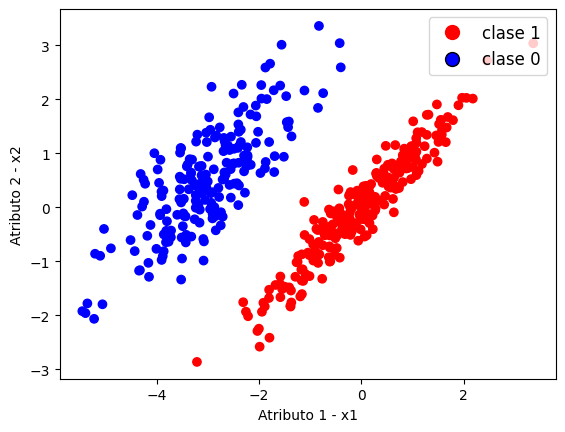

In [89]:
# Plot the data
plt.scatter(df.x1, df.x2, c=df.target, cmap='bwr') 

plt.xlabel('Atributo 1 - x1')
plt.ylabel('Atributo 2 - x2')

### Create legend with red and blue colors, and text "clase 1" and "clase 2"
red_patch = plt.plot([],[], marker="o", ms=10, ls="", color='r', label='clase 1')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec='black', color='b', label='clase 0')
plt.legend(handles=[red_patch[0], blue_patch[0]], loc='upper right', fontsize=12)
plt.show()

Los modelos lineales de clasificación consisten en trazar una línea recta que divida de un lado una clase y de otro lado otra. En el caso de más de dos dimensiones, consiste en colocar un hiperplano que divida el espacio en dos mitades; a un lado y el otro del hiperplano, clasificamos como una u otra clase.

La manera matemática de caracterizar una linea recta en un plano es con una simple ecuación:
$$ w_1  x_1 + w_2 x_2 = cte $$
donde $w_1$ y $w_2$ determinan el ángulo de la linea, y la constante mueve paralelamente esa recta. A los números $w_i$ se le llaman _pesos_.

En el caso más general de $n$ dimensiones, generaliza de igual forma:
$$
w_0 + w_1  x_1 + w_2 x_2 + ... + w_n  x_n = 0
$$
donde a la constante la reescribimo como $-w_0$ para llevar la ecuación a una forma convencional.

- Al hiperplano que separa los puntos se le llama **_"frontera de decisión"_**.

- Éste esta caracterizado por ser donde se anula la función lineal $f(\vec w, \vec x) = w_0 + w_1  x_1 + w_2 x_2 + ... + w_n  x_n $

- A la función usada para clasificar se le llama **función discriminante**.

**Ejercicio:** Para el caso con dos atributos, responde:
* ¿Cómo deberían ser $w_1$ y $w_2$ para que la recta sea horizontal?¿Y para que sea vertical?


RTA:  en este caso, para que sea horizontal $w_1$ == 0 y para que sea vertical $w_2$ == 0

* ¿Cómo se relacionan $x_1$, $x_2$, $w_0$, $w_1$ y $w_2$ con la pendiente de la recta y la ordenada al origen de la forma lineal $y = mx + b$?

**Ejercicio:** Explorá la función `model` y utilizala - junto con `plot` - para encontrar la mejor frontera de decisión.

In [90]:
def model(w, x1, x2):
    return w[0] +w[1]*x1 + w[2]*x2 > 0              # Es la función de Z: Si el resultado es mayor que 0, devuelve True. Si es menor, devuelve False

def plot(x1, x2, target, pred, w=[]):

    plt.scatter(x1[target==0], x2[target==0], marker='o', c=np.where(pred[target==0], 'r', 'b'), label='Class 0')
    plt.scatter(x1[target==1], x2[target==1], marker='v', c=np.where(pred[target==1], 'r', 'b'), label='Class 1')
    plt.legend()

    if len(w) >= 3 and (w[2]!=0 or w[1]!=0):        # Me dice que debe haber por lo menos 3 coeficientes, y que w1 y w2 no deben ser nulos. 
        
        if w[2]==0:                                 # Si w2 es igual a 0, la frontera de decisión es vertical 
            plt.vlines(-w[0]/w[1],x2.min(), x2.max(), ls='-.', colors='black')      # traza una linea verticalk en -w0/w1. 

        else:
            u = np.linspace(min(x1), max(x1), 100)
            v = -(w[0] + w[1]*u) / w[2]
            plt.plot(u,v, ls='-.', c='black')       # trazamos la frontera de decisión

    plt.xlabel('Atributo 1 - x1')                   # Etiquetas de los ejes. 
    plt.ylabel('Atributo 2 - x2')
    plt.legend()

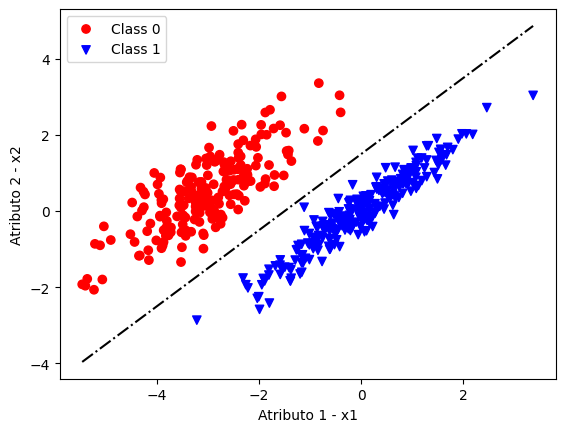

In [91]:

w =[
    -1.5, #w0 es la constante
    -1, #w1 son los pesos que determinan el angulo
    1, #w2
    ]

preds = model(w, df.x1, df.x2)
#print(preds)
plot(df.x1, df.x2, df.target, preds, w)


Éste es el más sencillo de los métodos llamados de _función discriminante_. Estos consisten en ajustar una función escalar, cuyo valor determina la clase a la que pertenece, dependiendo de si está por encima o debajo del _umbral de decisión_.

A esta función lineal, cuando se combina con un método particular para elegir los pesos $w$, se le llama _modelo_. Un caso particular es el llamado _Perceptrón_ que corresponde a elegir el $w$ que minimice el número de puntos mal clasificados.

## Regresor Logístico

El regresor logístico es un método discrtiminativo, es decir que nos provee no sólo la predicción de _a que clase pertenece una muestra_, sino que responde a la pregunta de _cual es la probabilidad de que una muestra pertenezca a una clase_. Esta probabilidad podrá ser luego usada para clasificar (es decir, usando la probabilidad como función discriminante), donde se asigna cada muestra a la clase más probable (umbral = 0.5) o de otra forma a su elección.

Es un _modelo lineal generalizado_, es decir que se basa en un modelo lineal cuyo resultado se pasa por una _función de vínculo_ que en este caso es la función sigmoide.
Matemáticamente:
$$ p = \sigma(w_0 + w_1 x^{(i)}_1 + ... + + w_N x^{(i)}_N) $$

siendo $\sigma $ la función sigmoide $\sigma(z) = \frac{1}{1 + e^{-z}}$

Text(0, 0.5, '$\\sigma (z)$')

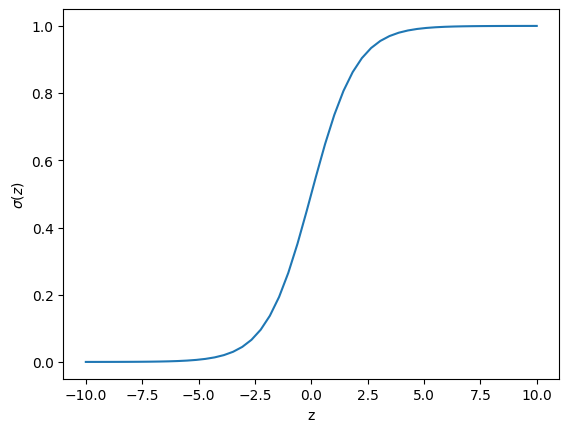

In [92]:
# función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# z = w0 + w1*x1 + w2*x2 + .... + wn*xn     (donde w0 es la constante, el resto de w los coeficientes y las x las características de entrada)

#Grafico de la función sigmoide
z = np.linspace(-10,10)
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("$\sigma (z)$")

**Ejercicio** 
1. Use el regresor logístico de Scikit-Learn para ajustar los datos. Utilice el parámetro `penalty = 'none'`.



In [93]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty= None)  # Creamos el regresor logístico con penalty = 'none'

print(df)

X = df[['x1', 'x2']]                        # Características  
y = df['target']                            # Etiqueta
model.fit(X, y)                             # Ajustamos/Entrenamos el modelo a los datos



           x1        x2  target
0   -0.422635 -0.932620     1.0
1   -3.036275  0.482545     0.0
2   -0.634106 -0.040808     1.0
3   -0.448945  0.330000     1.0
4    0.293817  0.638174     1.0
..        ...       ...     ...
445 -1.797550 -2.414854     1.0
446 -0.853657 -0.420858     1.0
447 -0.242662  0.216986     1.0
448 -3.527124  0.114473     0.0
449 -2.653479  0.609464     0.0

[450 rows x 3 columns]


LogisticRegression(penalty=None)

2. Calcule el vector de probabilidades predichas por el modelo ajustado sobre el dataset. Examine e interprete su resultado.

*Pistas: `.predict_proba(X)`*


In [94]:
probabilidades_predichas = model.predict_proba(X)
#print(probabilidades_predichas)

probabilidades_predichas_redondeadas = np.round(probabilidades_predichas, decimals=4)
print(probabilidades_predichas_redondeadas)



[[0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [1.000e-04 9.999e-01]
 [0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [9.999e-01 1.000e-04]
 [0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [1.000e+00 0.000e+00]
 [9.997e-01 3.000e-04]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [1.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [1.000e+00 0.000e+00]
 [1.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [0.000e+00

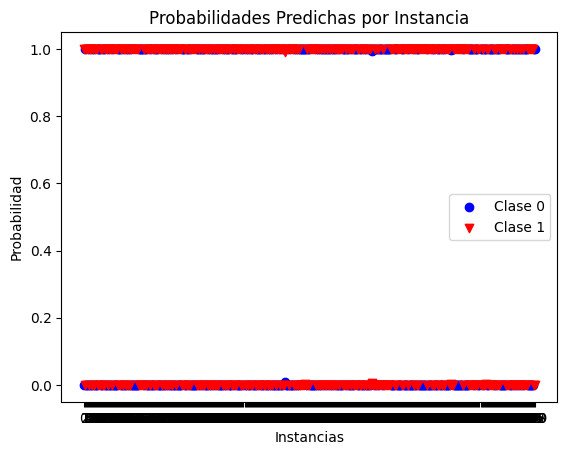

In [95]:
# scatterplot de las probabilidades predichas  

plt.scatter(range(len(probabilidades_predichas)), probabilidades_predichas[:, 0], label='Clase 0', color='blue', marker='o')
plt.scatter(range(len(probabilidades_predichas)), probabilidades_predichas[:, 1], label='Clase 1', color='red', marker='v')

plt.xlabel('Instancias')                                        # etiquetas
plt.ylabel('Probabilidad')
plt.xticks(range(len(probabilidades_predichas)))
plt.legend()
plt.title('Probabilidades Predichas por Instancia')
plt.show()

3. Obtenga los pesos del modelo lineal y utilícelos para graficar la frontera de decisión.

*Pistas:*
- Considere los atributos `.coef_` y `.intercept_` del regresor logístico.
- La frontera de decisíon (típicamente) se obtiene cuando la sigmoide toca el umbral 0.5. Sabiendo esto:
    * Con lápiz y papel, obtenga la fórmula para la frontera de decisión.
    * Valerse de la función de ploteo utilizada anterioremente para graficar la frontera.

[array([16.66172931]), 9.890327266513093, -8.85272318352572]


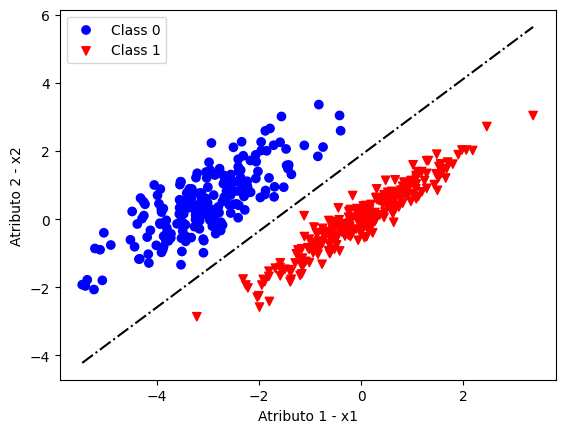

In [96]:
coeficientes = model.coef_[0]   # w1 y w2
intercepto = model.intercept_   # w0

Wn = [
    intercepto, # w0 es la constante
    coeficientes[0], # w1 son los pesos que determinan el ángulo
    coeficientes[1], # w2
]

preds2 = model.predict(X)  # Predicciones del modelo sobre los datos de entrada X
plot(X.iloc[:, 0], X.iloc[:, 1], y, preds2, Wn)

print(Wn)

4. Utilice la siguiente función para graficar la frontera de decisión y los puntos de entrenamiento. Interprete.

In [97]:
# Función que nos ayuda a graficar
# No hace falta que comprandan este bloque de código.
def visualize_classifier(model, X, y, ax=None, proba = False):
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    ax = ax or plt.gca()
    
    colors_tab10 = plt.cm.tab10.colors
    
    for i, y_value in enumerate(reversed(np.unique(y))):
        ax.scatter(X[y==y_value, 0], X[y==y_value, 1], s=30,
                   zorder=3, alpha = 0.5, color = colors_tab10[i])

    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    # ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    
    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    
    # Create a color plot with the results    
    Z = -Z + 1
    ax.pcolormesh(xx,yy,Z,cmap='bwr', vmin = 0, vmax=1, alpha = 0.2)

    ax.set(xlim=xlim, ylim=ylim)
    

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


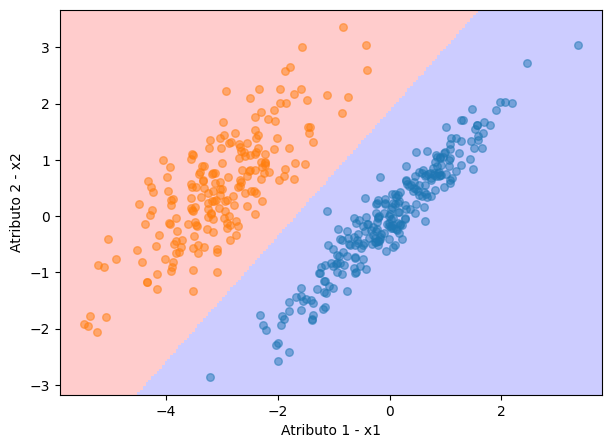

In [98]:
fig, axs=  plt.subplots(1,1, figsize = (7,5))
visualize_classifier(model, X, y, ax = axs, proba = False)
axs.set_xlabel('Atributo 1 - x1')
axs.set_ylabel('Atributo 2 - x2')
plt.show()

## Conjunto de datos de EverythingALS 

Aplica lo visto al conjunto de datos de EverythingALS. Volver a clasificar aquellas sesiones que corresponden a pacientes controles y las que corresponden a pacientes enfermos usando regresión logística.

**Ejercicio:** Selecciona dos atributos y utiliza un modelo de Regresión Logística. Comparar con los resultados obtenidos al aplicar un Árbol de Decisión. Evalúa ambos modelos usando las herramientas vistas en la guía de Evaluación.

## Extra: Conjunto de datos de Default

1. Abrir el conjunto de datos `Default.csv` y explorar brevemente sus características. ¿Cuáles son las variables predictoras? ¿Cuál es la variable de respuesta? ¿Cuántas observaciones hay en el conjunto de datos? Dejamos una breve explicación de cada columna:

* `default`: Un factor con niveles 'No' y 'Yes' que indica si el cliente incumplió con su deuda.
* `student`: Un factor con niveles 'No' y 'Yes' que indica si el cliente es un estudiante.
* `balance`: El saldo promedio que el cliente tiene pendiente en su tarjeta de crédito después de realizar su pago mensual.
* `income`: Ingresos del cliente.

2. Entrenar un regresor logística con `default` como target y `balance` como predictor. Utilizar el parámetro `penalty = 'none'`. Recuerda hacer un split entre train y test. Visualiza ambas variables y la probabilidad predicha con el modelo. Evalúa su exactitud.

3. Entrena otro modelo pero agregando una segunda variable de tu elección. Visualiza y evalúa. 

**Para pensar:** ¿cómo interpretarías los coeficientes de cada variable?¿Qué ocurre cuando se trata de variables categóricas como `student`?

In [99]:
df = pd.read_csv('C://Users//Usuario//aprendizajeautomatico//IntroduccionAprendizajeAutomatico//res//Default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [100]:
df['default'] = df['default'].replace({'No': 0, 'Yes': 1})
df['student'] = df['student'].replace({'No': 0, 'Yes': 1})
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


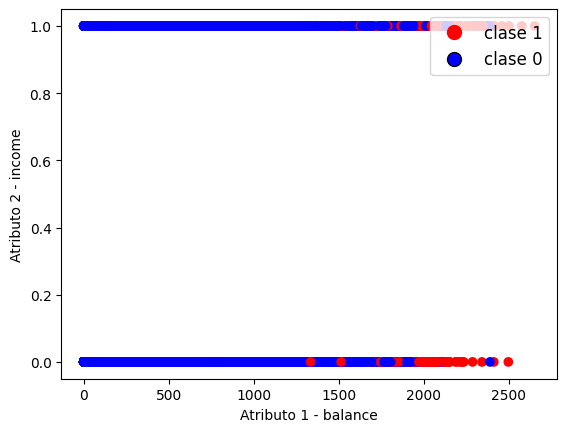

In [101]:
#exploracion
# Plot the data
plt.scatter(df.balance, df.student, c=df.default, cmap='bwr') 

plt.xlabel('Atributo 1 - balance')
plt.ylabel('Atributo 2 - income')

### Create legend with red and blue colors, and text "clase 1" and "clase 2"
red_patch = plt.plot([],[], marker="o", ms=10, ls="", color='r', label='clase 1')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec='black', color='b', label='clase 0')
plt.legend(handles=[red_patch[0], blue_patch[0]], loc='upper right', fontsize=12)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array([['r', 'r'],
       ['r', 'r'],
       ['r', 'r'],
       ...,
       ['r', 'r'],
       ['r', 'r'],
       ['r', 'r']], dtype='<U1')

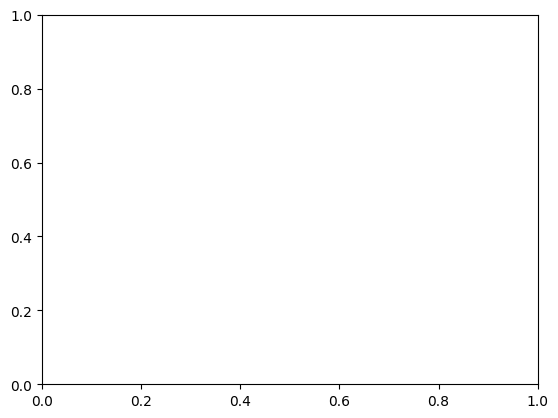

In [102]:
## modelo con balance como predictor
model = LogisticRegression(penalty= None)  # Creamos el regresor logístico con penalty = 'none'

X = df[["balance"]]                        # Características  
y = df['default']                          # Etiqueta
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)


model.fit(X_train, y_train) # Ajustamos/Entrenamos el modelo a los datos

probabilidades_predichas = model.predict_proba(X_test) #predecimos las probabilidades del grupo de prueba
coeficientes = model.coef_   # w1 
intercepto = model.intercept_   # w0

Wn = [
    intercepto, # w0 es la constante
    coeficientes[0], # w1 son los pesos que determinan el ángulo

]

plot(X_test.iloc[:, 0], X_test.iloc[:, 0], y_test, probabilidades_predichas, Wn)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array([['red', 'red'],
       ['red', 'red'],
       ['red', 'red'],
       ...,
       ['red', 'red'],
       ['red', 'red'],
       ['red', 'red']], dtype='<U4')

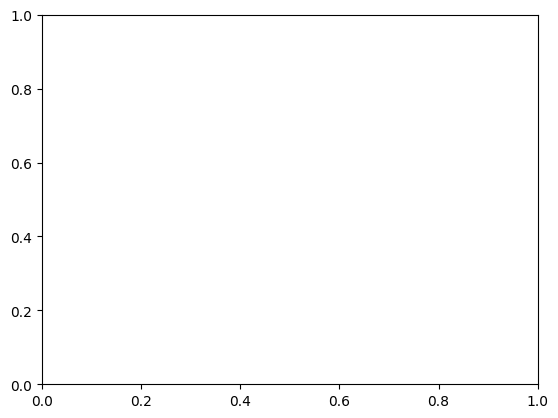

In [ ]:
## modelo con balance y income como predictor
model = LogisticRegression(penalty= None)  # Creamos el regresor logístico con penalty = 'none'

X = df[["balance", "income"]]                        # Características  
y = df['default']                                    # Etiqueta
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)


model.fit(X_train, y_train) # Ajustamos/Entrenamos el modelo a los datos

probabilidades_predichas = model.predict_proba(X_test) #predecimos las probabilidades del grupo de prueba
coeficientes = model.coef_[0]   # w1 
intercepto = model.intercept_   # w0

Wn = [
    intercepto, # w0 es la constante
    coeficientes[0], # w1 son los pesos que determinan el ángulo
    coeficientes[1]

]

plot(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test, probabilidades_predichas, Wn)